In [ ]:
#importamos las librerías que necesitamos

#para el ratamiento de datos
import pandas as pd
import numpy as np

#para la isualización
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

#configuramos para ver todas las columnas
pd.set_option('display.max_columns', None)

In [2]:
#importamos el dataset. El argumento 'parse_dates' le dice a pandas qué columna debe interpretar como fechas, porque por defecto, pandas lee todas como str
df = pd.read_csv('/Users/lucianayelicich/Desktop/Adalab/bda-modulo-3-evaluacion-final-lucianayelicich/Data/archivo_aviacion_final.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Loyalty Number,Date,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,0,100018,2017-01-01,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,1,100102,2017-01-01,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,80078.584644,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,2,100140,2017-01-01,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79948.034131,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,3,100214,2017-01-01,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,4,100272,2017-01-01,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [3]:
#chequeamos los tipos de datos con los que vamos a trabajar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   403760 non-null  int64         
 1   Loyalty Number               403760 non-null  int64         
 2   Date                         403760 non-null  datetime64[ns]
 3   Flights Booked               403760 non-null  int64         
 4   Flights with Companions      403760 non-null  int64         
 5   Total Flights                403760 non-null  int64         
 6   Distance                     403760 non-null  int64         
 7   Points Accumulated           403760 non-null  float64       
 8   Points Redeemed              403760 non-null  int64         
 9   Dollar Cost Points Redeemed  403760 non-null  int64         
 10  Country                      403760 non-null  object        
 11  Province                  

1 . ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
#agrupamos la totalidad de vuelos por cada mes
df_vuelos_por_mes = df.groupby('Date')['Flights Booked'].sum().reset_index()

#ordenamos los datos cronológicamente
df_vuelos_por_mes = df_vuelos_por_mes.sort_values(by='Date')

In [7]:
#chequeamos el nuevo df
df_vuelos_por_mes.head()

,Date,Flights Booked
0,2017-01-01,47766
1,2017-02-01,47691
2,2017-03-01,64271
3,2017-04-01,55720
4,2017-05-01,65279


In [8]:
#cheqeuamos los valores únicos para ver la extensión de nuestro eje x
valores_unicos = df_vuelos_por_mes['Date'].unique()

print(valores_unicos)

<DatetimeArray>
['2017-01-01 00:00:00', '2017-02-01 00:00:00', '2017-03-01 00:00:00',
 '2017-04-01 00:00:00', '2017-05-01 00:00:00', '2017-06-01 00:00:00',
 '2017-07-01 00:00:00', '2017-08-01 00:00:00', '2017-09-01 00:00:00',
 '2017-10-01 00:00:00', '2017-11-01 00:00:00', '2017-12-01 00:00:00',
 '2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00',
 '2018-04-01 00:00:00', '2018-05-01 00:00:00', '2018-06-01 00:00:00',
 '2018-07-01 00:00:00', '2018-08-01 00:00:00', '2018-09-01 00:00:00',
 '2018-10-01 00:00:00', '2018-11-01 00:00:00', '2018-12-01 00:00:00']
Length: 24, dtype: datetime64[ns]


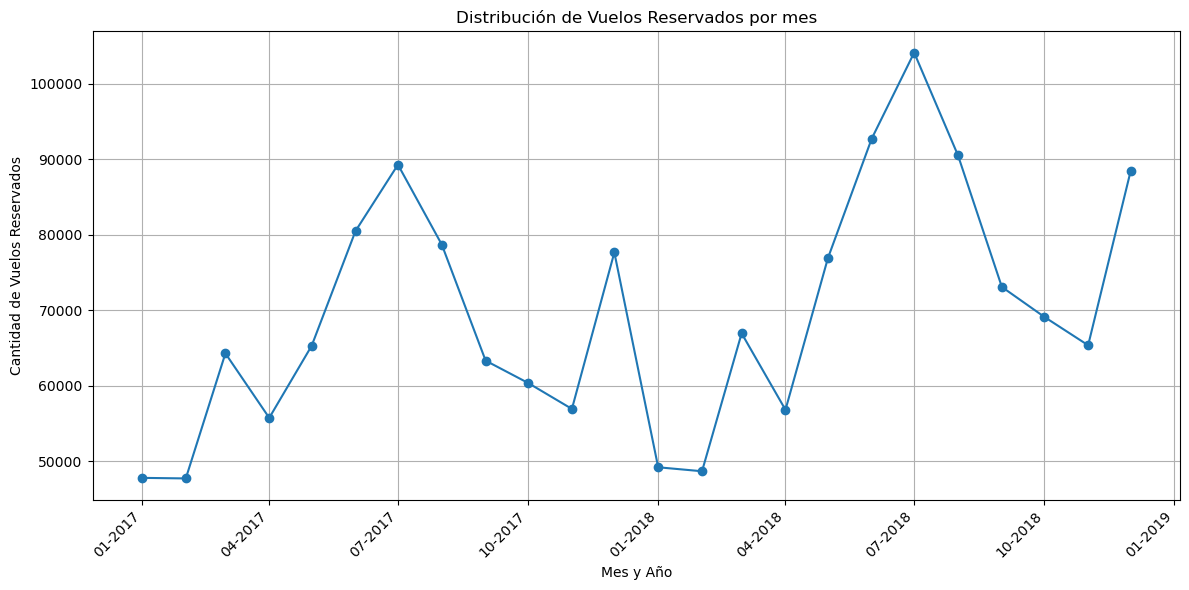

In [74]:
#utilizaremos un gráfico de líneas que es ideal para visualizar datos que cambian en el tiempo
#ordenamos el df filtrando por la columna 'Date'
df_vuelos_por_mes = df_vuelos_por_mes.sort_values(by='Date')

#confoguramos el grafico
plt.figure(figsize=(12, 6))   #establecemos el tamaño de la ventana
ax = plt.gca()   #creamos una variable que nos permite editar los ejes más adelante

#formateamos el eje X para mostrar solo mes y año, que son los datos brindados en el csv original
date_format = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_format)

#graficamos el df, usando círculos y líneas continuas 
plt.plot(df_vuelos_por_mes['Date'], df_vuelos_por_mes['Flights Booked'], marker='o', linestyle='-')

#añadimos etiquetas, título, y cuadrícula para facilitar la interpretación
plt.title('Distribución de Vuelos Reservados por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.grid(True)

#configuramos la legibilidad de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()   #ajusta automáticamente los parámetros del gráfico
plt.show()

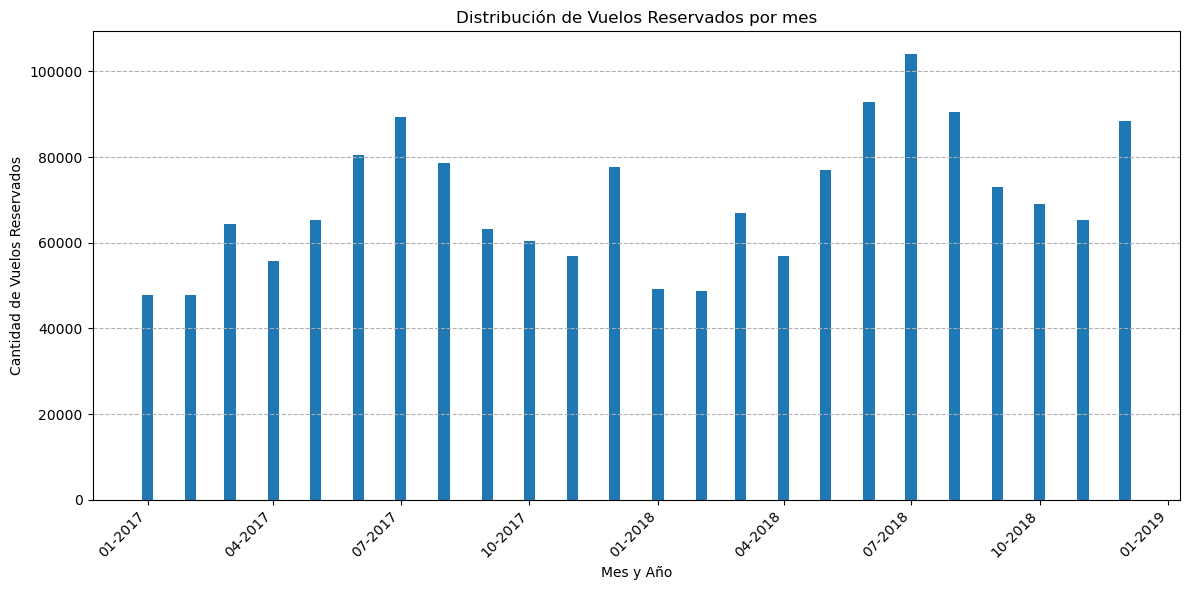

In [77]:
#alternativamente podemos usar un gráfico de barras
#ordenamos el df filtrando por la columna 'Date' para que esté ordenado cronológicamente y que las barras se muestren en la secuencia correcta.
df_vuelos_por_mes = df_vuelos_por_mes.sort_values(by='Date')

#configuramos el gráfico de barras.
plt.figure(figsize=(12, 6))   #establecemos el tamaño de la ventana
ax = plt.gca()   #creamos una variable que nos permite editar los ejes más adelante

#formateamos el eje X para mostrar solo mes y año.
date_format = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_format)

#graficamos el df, y establecemos el ancho de las barras 
plt.bar(df_vuelos_por_mes['Date'], df_vuelos_por_mes['Flights Booked'], width=8)

#añadimos título, y cuadrícula para facilitar la interpretación (en este caso punteada)
plt.title('Distribución de Vuelos Reservados por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.grid(axis='y', linestyle='--')

#configuramos la legibilidad de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.tight_layout()    #ajusta automáticamente los parámetros del gráfico
plt.show()

 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


In [82]:
df["Distance"].describe()

count    403760.000000
mean       1214.460979
std        1434.098521
min           0.000000
25%           0.000000
50%         525.000000
75%        2342.000000
max        6293.000000
Name: Distance, dtype: float64

In [86]:
df["Points Accumulated"].describe()

count    403760.000000
mean        124.263761
std         146.696179
min           0.000000
25%           0.000000
50%          53.000000
75%         240.000000
max         676.500000
Name: Points Accumulated, dtype: float64

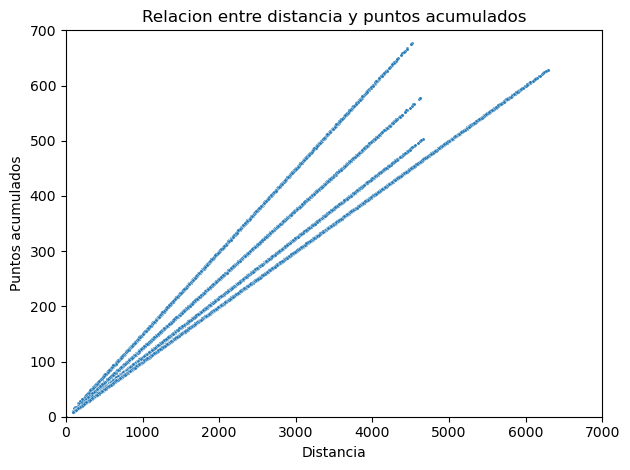

In [81]:
#como se trata de un análisis bivariable numérica, utilizamos un scatterplot
#insertamos ambas variables, definimos la forma de los marcadores y su tamaño 
sns.scatterplot(data=df, x = 'Distance', y = 'Points Accumulated', marker='o', s=5)
plt.xlim(0,7000)  #ajustamos los limites del eje x, conforme a los valores máx y min extraidos antes
plt.ylim(0, 700)  #ajustamos los limites del eje y, conforme a los valores máx y min extraidos antes
plt.title('Relacion entre distancia y puntos acumulados')  #titulamos el gráfico
plt.xlabel('Distancia')  #establecemos etiquetas para el eje x
plt.ylabel('Puntos acumulados') #establecemos etiquetas para el eje y
plt.tight_layout()   #ajustamos automáticamente los parámetros del gráfico
plt.show();

#observamos que existe una relación directa entre la distancia recorrida y los puntos acumulados
#es decir que a mayor distancia, más puntos, una relación directamente proporcional


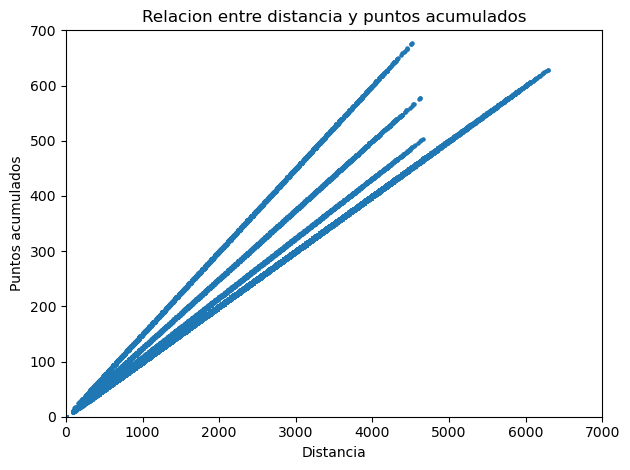

In [88]:
#también podemos realizar el análisis utilizando Matplotlib, y arribamos la mismo gráfico y conclusión
plt.scatter(data=df, x = 'Distance', y = 'Points Accumulated', marker='o', s=5)
plt.xlim(0,7000)
plt.ylim(0, 700)
plt.title('Relacion entre distancia y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')
plt.tight_layout()
plt.show();

 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
#para mostrar el recuento de cada categoría en una variable, usamos un gráfico de barras

In [ ]:
#creamos un índice que contiene las categorias de la variable para luego pasárselo al eje x
orden_provincia = df['Province'].value_counts().index

In [14]:
orden_provincia

Index(['Ontario', 'British Columbia', 'Quebec', 'Alberta', 'Manitoba',
       'New Brunswick', 'Nova Scotia', 'Saskatchewan', 'Newfoundland', 'Yukon',
       'Prince Edward Island'],
      dtype='object', name='Province')

In [90]:
df["Province"].describe(include="object")

count      403760
unique         11
top       Ontario
freq       130258
Name: Province, dtype: object

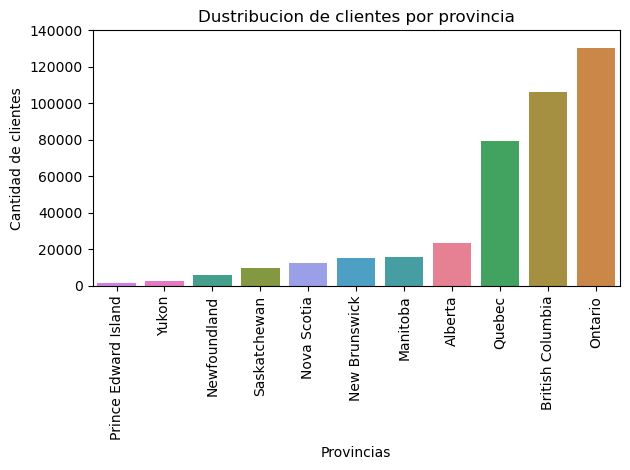

In [15]:
#creamos nuestro gráfico, le indicamos cuáles son las categorías, le indicamos que coloque un color distinto para cada una
#y que las ordene de mayor a menor frecuencia
sns.countplot(data = df, x= "Province", hue='Province', order=orden_provincia[::-1])
plt.xticks(rotation = 90)  #como los nombres son largos, los colocamos de manera vertical para evitar su superposición
plt.ylim(0, 140000)  #establecemos los límites del eje teniendo en cuenta el análisis de la celda anterior
plt.title('Dustribucion de clientes por provincia')   #titulamos el gráfico
plt.xlabel('Provincias')   #nombramos al eje x
plt.ylabel('Cantidad de clientes')   #nombramos al eje y
plt.tight_layout()   #ajustamos automáticamente los parámetros
plt.show();

 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
#usamos un gráfico de barras horizontal para comparar una variable numérica (el salario promedio) entre diferentes grupos 
#o categorías (los niveles educativos). 

In [ ]:
#para cada nivel educativo, calculamos el salario promedio y lo agrupamos por categoría
orden_salario_educacion = df.groupby('Education')['Salary'].mean().reset_index()


In [27]:
orden_salario_educacion.head()

,Education,Salary
0,Bachelor,72599.080913
1,College,79432.699982
2,Doctor,178403.675202
3,High School or Below,61146.378165
4,Master,103734.523724


In [35]:
#obtenemos las principales métricas, que nos permitiran definir parámetros del gráfico
orden_salario_educacion.describe()

,Salary
count,5.000000
mean,99063.271597
std,47010.966217
min,61146.378165
25%,72599.080913
50%,79432.699982
75%,103734.523724
max,178403.675202


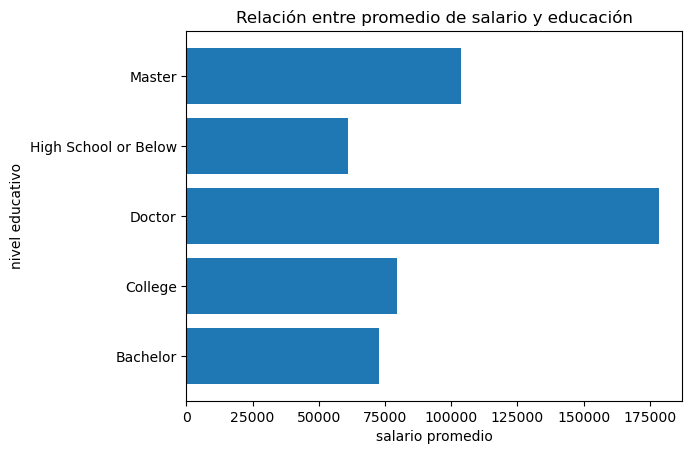

In [91]:
#creamos el gráfico, pasándole el df creado, y estbalciendo que las barras saldrán del eje y, y que la medida de las mismas será el monto de salario
plt.barh(data=orden_salario_educacion, y='Education', width='Salary')
plt.title('Relación entre promedio de salario y educación')   #aplicamos título
plt.xlabel('salario promedio')  #definimos etiquetas para el eje x
plt.ylabel('nivel educativo');   #definimos etiquetas para el eje y

 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
#usamos pieplot para visualizar la proporción de cada categoría en relación con un todo

In [ ]:
#primero conocemos los valores únicos que tomaremos
valores_unicos = df['Loyalty Card'].unique()

In [40]:
valores_unicos

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [ ]:
#sumamos la totalidad de usuarios para cada tipo de membresía
df_recuento = df['Loyalty Card'].value_counts().reset_index()

In [47]:
df_recuento

,Loyalty Card,count
0,Star,183745
1,Nova,136883
2,Aurora,83132


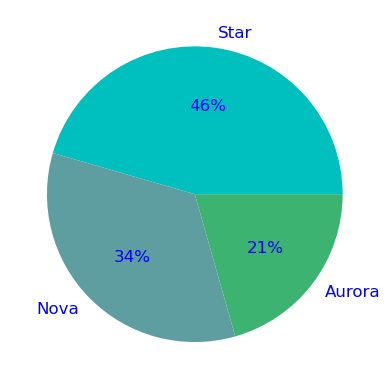

In [49]:
#establecemos los colores que usaremos
colores = ["c", "cadetblue", "mediumseagreen"]
#creamos el pie plot, con el df que configuramos antes, las categorías de fidelidad como etiquetas, la cantidad de decimales a mostrar,
#los colores definidos antes, tamaño y color de la fuente
plt.pie(data=df_recuento, x = 'count', labels='Loyalty Card', autopct=  '%.0f%%', colors=colores, textprops={'fontsize': 12, 'color': 'blue'});

 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
#como queremos ver la distribución de una variable categórica principal, pero segmentada y coloreada por una segunda variable 
#categórica, usaremos un gráfico de barras agrupado

In [50]:
df.columns  #chequeamos los nombres de las columnas de nuestro df

Index(['Unnamed: 0', 'Loyalty Number', 'Date', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [ ]:
valores_unicos = df['Marital Status'].unique()  #vemos cuales son los valores unicos de marital status

In [54]:
valores_unicos

array(['Married', 'Single', 'Divorced'], dtype=object)

In [ ]:
#usamos un crosstab para contar la frecuencia con la que ocurren las combinaciones de valores de las variables indicadas
clientes_genero_salario = pd.crosstab(df['Marital Status'], df['Gender']) 


In [63]:
clientes_genero_salario

Gender,Female,Male
Marital Status,,
Divorced,30634,30128
Married,117363,117482
Single,54760,53393


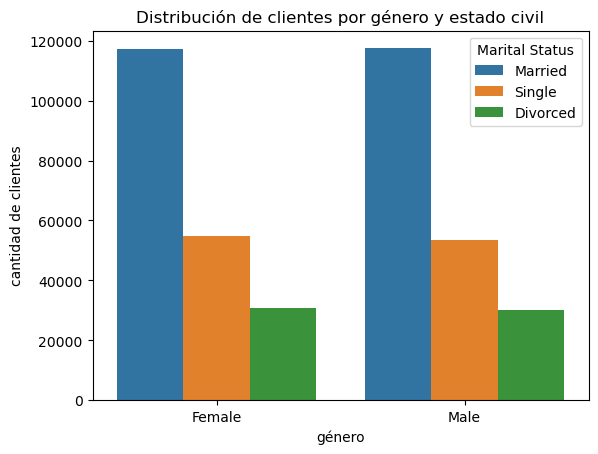

In [92]:
#creamos el gráfico de barras agrupadas, con el género en el eje x como primer variable, y luego con el hue creamos un grupo de 
# barras para cada categoría de la segunda variable, asignando un color diferente a cada una
sns.countplot(data=df, x='Gender', hue = 'Marital Status')
plt.title('Distribución de clientes por género y estado civil')  #definimos titulo del grafico
plt.xlabel('género')  #nombramos la etiqueta del eje x
plt.ylabel('cantidad de clientes')    #nombarmos la etiqueta del eje y
plt.xticks(rotation = 0);    #definimos la orientacion de las etiquetas

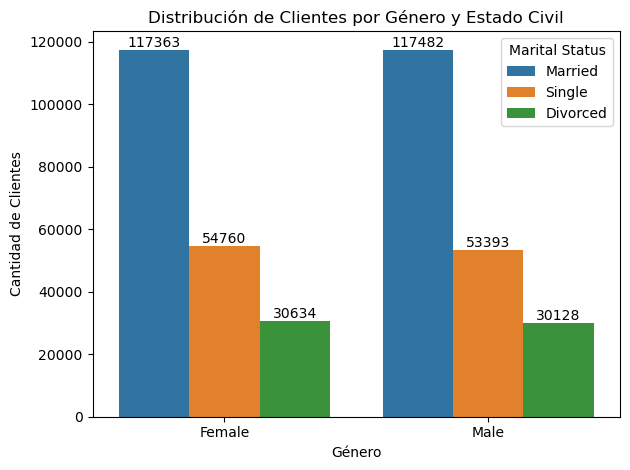

In [69]:
#como la diferencia para cada categoría es mínima y no llega a aprecirse en el cuadro, una opción puede ser adicionar etiquetas con los valores

ax = sns.countplot(data=df, x='Gender', hue = 'Marital Status')   #definimos una variable para poder manipular los ejes después
plt.title('Distribución de clientes por género y estado civil')  #ponemos titulo
plt.xlabel('género')    #etiqueta eje x
plt.ylabel('cantidad de clientes')   #etiqueta eje y

#obtenemos los contenedores de las barras (un grupo por cada color) e iteramos sobre ellos para añadir la etiqueta con el valor de la altura
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation = 0)   #definimos la orientacion de las etiquetas
plt.tight_layout() # Ajusta automáticamente los parámetros
plt.show()